#Earth Systems Modeling
##Lab 2: Exponential Functions, Ordinary Differential Equations & Simulations

<strong>Problem 1. Regression Analysis of a Population Model</strong><br/>In this exercise, we will be using a linear regression to fit our data with our simple exponential model. The data of column one represents time measurements, while column 2 is for individual bacterium in the units individuals$*1x10^{-3}$. You will then use the same analysis to fit data for a degrading compound in problem 2 below.


Part 1. Loading data as a numpy array. In the next cell we are using numpy to load a data file called expodata.txt. The file rests in the same directory as our notebook, which is why we use the notation $./$ Why is skiprows set to 1? Be sure to check your datafile by opening it. <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html">Documentation for loadtxt may be found here.</a>

[[  0.      1.088]
 [  1.      1.156]
 [  2.      1.24 ]
 [  3.      1.383]
 [  4.      1.5  ]
 [  5.      1.709]
 [  6.      1.851]
 [  7.      2.075]
 [  8.      2.25 ]
 [  9.      2.528]
 [ 10.      2.77 ]]


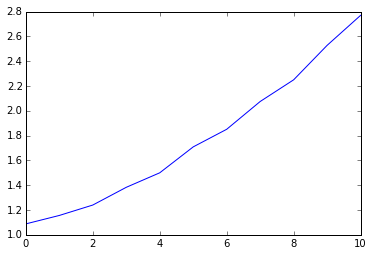

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

expodata = np.loadtxt('./expodata.txt',skiprows=1)
print expodata


plt.plot(expodata[:,0], expodata[:,1])



<p>Part 2. Write a python function called exponential.py for the expression: $X(t) = X(t_0)e^{at}$. Your function should have three arguments, the first should be an array of your independent variable. <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html"> See the documentation of numpy arrays here.</a> Your larger array of data has two columns. NumPy arrays may be address as expodata[rows, columns]. To collect all of the values for x[ind], you would type expodata[0:,1].</p>
<p>Be sure to save your function in a file that will be imported in your final plotting script.</p

In [2]:
import numpy as np
expodata = np.loadtxt('./expodata.txt',skiprows=1)

def exponential(t,X,a):
    y= X*np.exp(a*t)
    return y
   
exponential(0.005,1.5,5)

1.5379726807866434

<p>Part 3. Our next step is to create a linear regression in python. The procedure is relatively simple, once your data has been loaded. The first step is to linearize your data. Think about how you would perform this step mathematically.  Hint: look back to the derivation of the exponential relationship, equation (4) in your reading holds a major clue. <a href="http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html"> You can read the SciPy documentation here.</a></p>
<p>Once you have the slope and intercept for your linear fit, you will have to perform the inverse mathematical operation to convert your data back into an exponential function. Plot this "exponential model" found by linear regression against your data. The model should appear as a solid line, and the data as points. <a href="http://matplotlib.org/users/screenshots.html">Documentation may be found here.</a></p>

0.0461076730069 0.998358804232 1.71638775504e-12


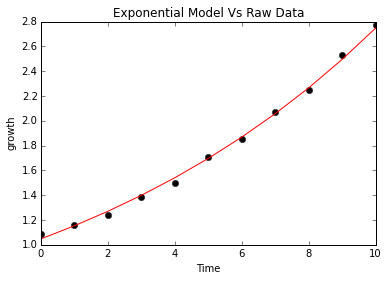

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt # a function in matplotlib called plt.subplot
import numpy as np
from scipy import stats
expodata = np.loadtxt('./expodata.txt',skiprows=1)

cells=np.log(expodata[:,1])
time=expodata[:,0]
bacterium=expodata[:,1]

[m,c,r,p,sterr] = stats.linregress(expodata[:,0],np.log(expodata[:,1]))

slope=m
y=c+(slope*time) #y=lnX+kt
intc=np.exp(c)


def exponential(t,X,a):
    y= X*np.exp(a*t)
    return y
growth=exponential(time,intc,slope)

print c,r,p

plt.plot(time,bacterium,'ko',time,growth,'r-') # o means circles
plt.title("Exponential Model Vs Raw Data ")
plt.xlabel("Time")
plt.ylabel("growth")
plt.show()


<p>Part 4. Since we have a good idea our data follows an exponential relationship, we can use a nonlinear fit. <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html" >In SciPy the optimize module has a curve fit function</a>. The advantage of a non-linear fit is that our data does not need to be linearized in advance.</p> 
<p>Once you have the estimated parameters for you nonlinear fit, plot this "exponential model" against your data. The model should appear as a solid line, and the data as points.</p><p>For your notebook, describe your data and reason for making a exponential fit. In your description you should your plots with a figure caption. Finally, make a prediction (extrapolation) concerning the time it will take for your population to double it's final measured size. When presenting your prediction, be sure to state 1 or 2 reasons why the colony might not reach this ultimate size in the predicted time.</p>

[ 1.03806845  0.09797732]
[[  1.33950883e-04  -1.61325738e-05]
 [ -1.61325738e-05   2.27815880e-06]]


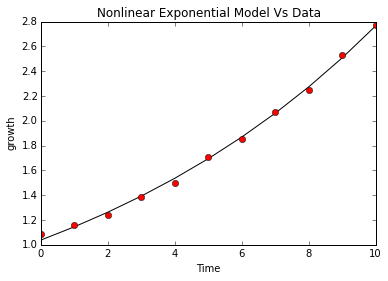

17.4733751926


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
expodata = np.loadtxt('./expodata.txt',skiprows=1)
from exporeal import *
from scipy.optimize import curve_fit


def exponential(t,X,a):
    y= X*np.exp(a*t)
    return y

xdata=expodata[:,0]
ydata=expodata[:,1]

popt, pcov = curve_fit(exponential, xdata, ydata,[1,1])
print popt
print pcov
model=exponential(expodata[:,0],popt[0],popt[1])

plt.plot(expodata[:,0],model,'k-',xdata, ydata,'ro') # - means lines

plt.legend()
plt.title("Nonlinear Exponential Model Vs Data")
plt.xlabel("Time")
plt.ylabel("growth")
plt.show()

t=np.log(2*expodata[10,1])/popt[1]
print t




<strong>Problem 2. Regression Analysis of Chemical Fate Model</strong>
<br/>Follow the steps enumerated above for the dataset expodata2.txt provided in your 
sagemath folder. This time the dataset represents the radioactive decay of Polonium-210 (becquerel) over a period of days. Your notebook description should at a minimum introduce the data and the two plots, but may be much more concise. Finally, use the rate constant and initial condition from your nonlinear fit to calcuate the half-life of the unknown chemical from your dataset. 

[ 0.98388603 -0.00490345]
[[  6.94270892e-05  -6.11207332e-07]
 [ -6.11207332e-07   1.01937247e-08]]


/projects/sage/sage-6.9/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


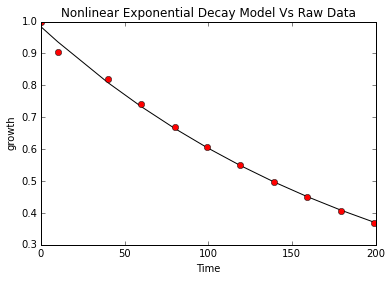

141.359195183


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
expodata2 = np.loadtxt('./expodata2.txt',skiprows=1)
from exporeal import *
from scipy.optimize import curve_fit

def exponential(t,X,a):
    y= X*np.exp(a*t)
    return y

xdata=expodata2[:,0]
ydata=expodata2[:,1]

popt, pcov = curve_fit(exponential, xdata, ydata,[1,-1])
print popt
print pcov
model2=exponential(expodata2[:,0],popt[0],popt[1])

plt.plot(expodata2[:,0],model2,'k-',xdata, ydata,'ro') # - means lines

plt.legend()
plt.title("Nonlinear Exponential Decay Model Vs Raw Data")
plt.xlabel("Time")
plt.ylabel("growth")
plt.show()


t=np.log(0.5)/popt[1]
print t
